In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [36]:
image = cv2.imread("Particles.png",0)

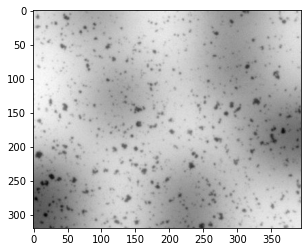

In [37]:
plt.imshow(image,"gray")

In [38]:
image

array([[217, 222, 220, ..., 212, 219, 221],
       [217, 220, 217, ..., 214, 220, 221],
       [216, 217, 217, ..., 212, 217, 218],
       ...,
       [ 90,  88,  90, ..., 234, 235, 235],
       [ 91,  90,  91, ..., 231, 232, 233],
       [ 93,  91,  87, ..., 228, 229, 232]], dtype=uint8)

In [62]:
#create the same size image

imgA = np.zeros_like(image)
imgB = np.zeros_like(image)

height = image.shape[0]
width = image.shape[1]

In [63]:
#padding 
#bulid N*N musk

maxNeighbour = max(math.floor(math.sqrt(height)),math.floor(math.sqrt(width)))
maxNeighbour


19

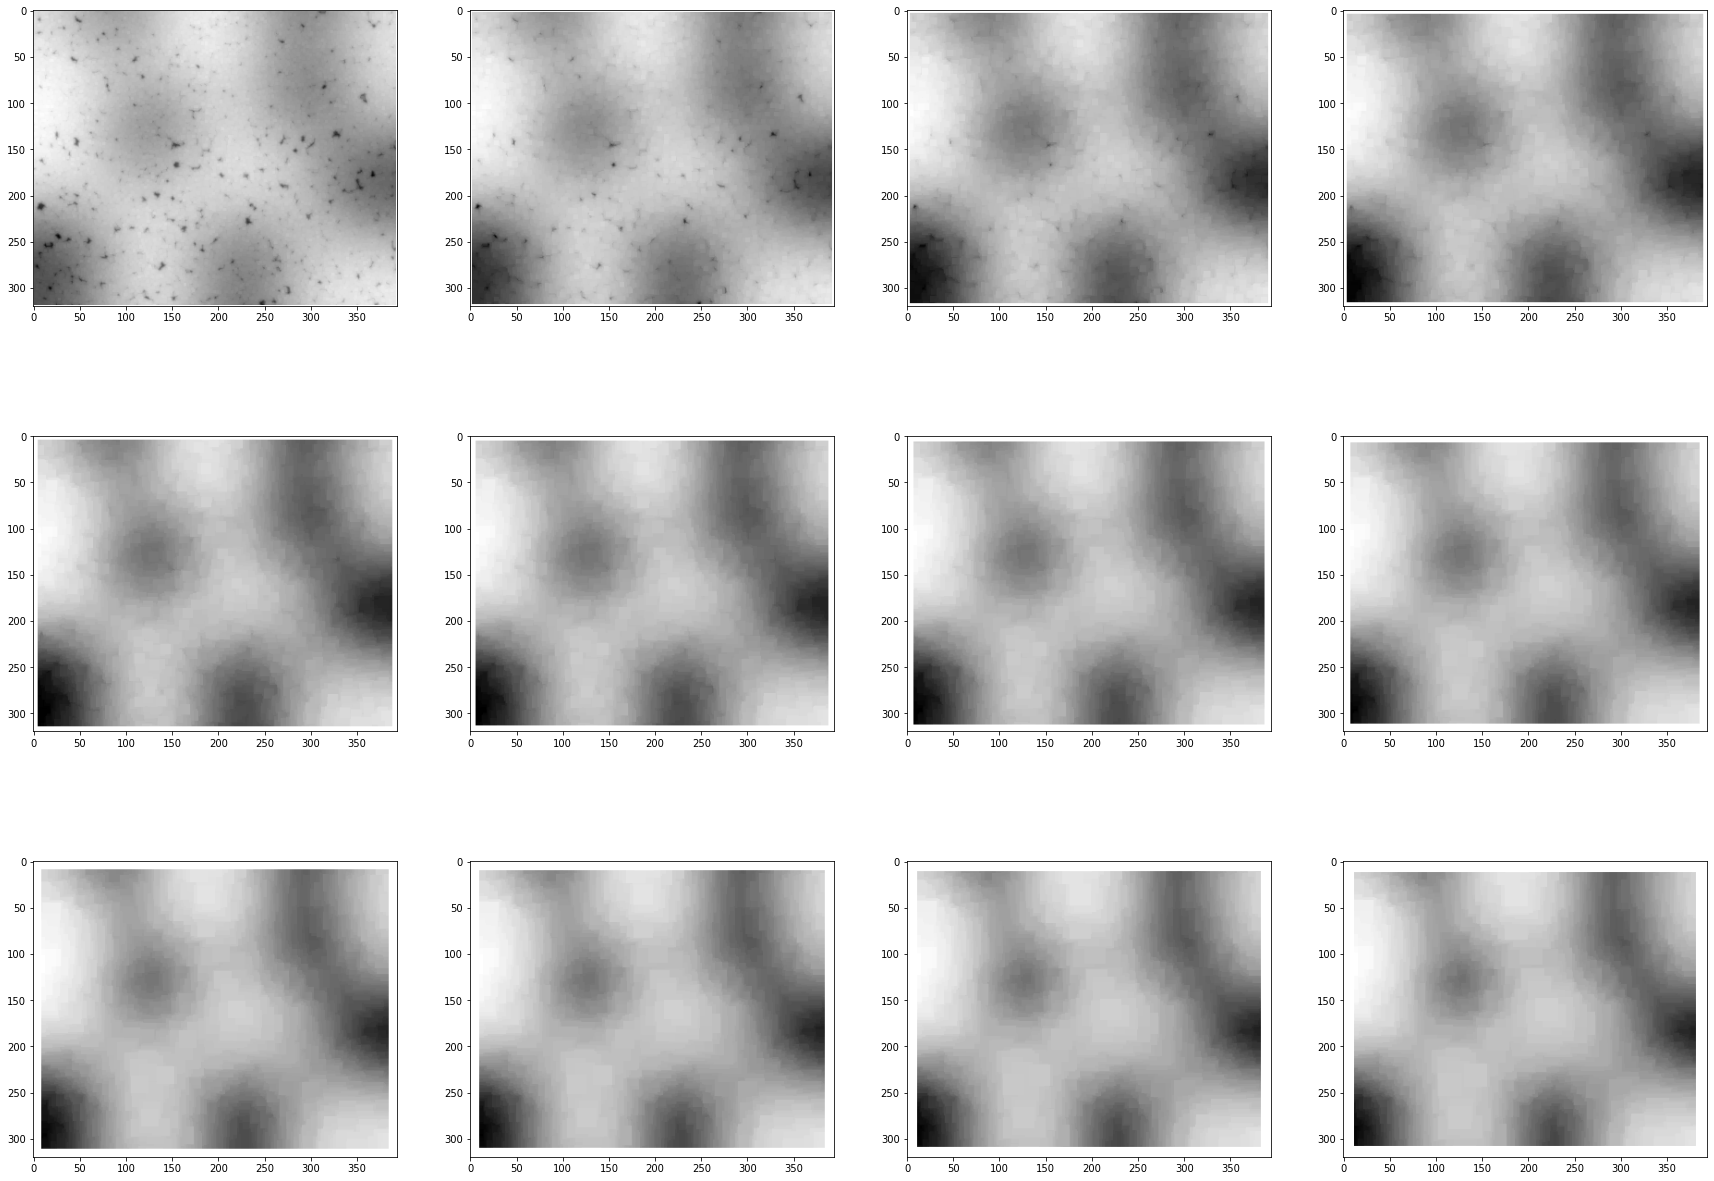

In [77]:

#iterate all possible neighour
#using max
index = 1
plt.figure(figsize=(30,30))
for N in range(3,maxNeighbour + 1,2):
    one = np.ones([N, N])
    #padding
    l = N // 2
    #make the center become 1,as it should be consider as well
    # using value 255 to make it white as the background is white ，0 is black
    img_padded = cv2.copyMakeBorder(image, l,l,l,l, cv2.BORDER_CONSTANT, value=255)
    #max-filtered
    for row in range(l, height+ l):
        for col in range(l, width + l):
            neighbourhood = img_padded[row - l:row + l + 1, col - l: col + l + 1] * one
            imgA[row - l,col - l] = np.max(neighbourhood)
            
    plt.subplot(4,4,index)
    plt.imshow(imgA,"gray")
    index += 1
plt.show()

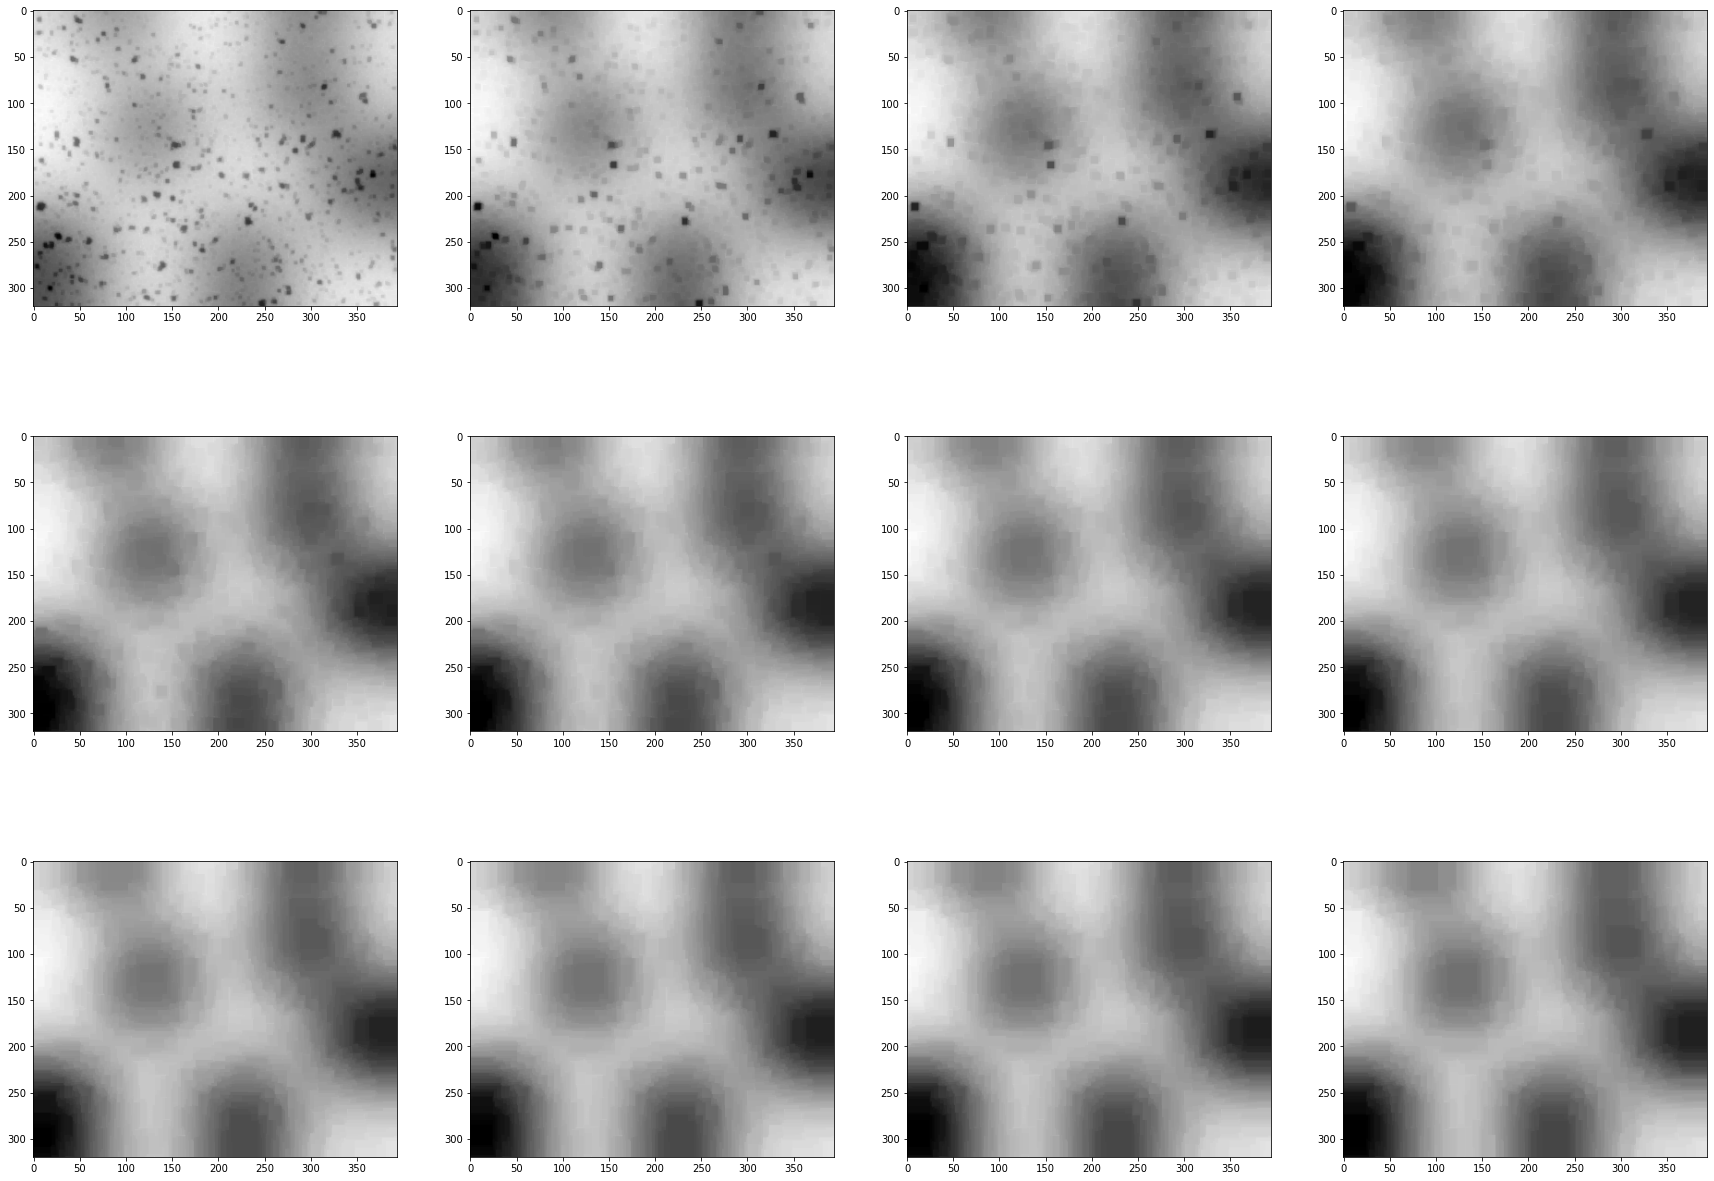

In [78]:
index = 1
plt.figure(figsize=(30,30))
for N in range(3,maxNeighbour + 1,2):
    one_musk = np.ones([N, N])
    #padding
    l = N // 2
    img_padded = cv2.copyMakeBorder(image, l,l,l,l, cv2.BORDER_CONSTANT, value=255)
    #max-filtered
    for row in range(l, height+ l):
        for col in range(l, width + l):
            neighbourhood = img_padded[row - l:row + l + 1, col - l: col + l + 1] * one_musk
            imgA[row - l,col - l] = np.max(neighbourhood)
       
    imgA_padded = cv2.copyMakeBorder(imgA, l,l,l,l, cv2.BORDER_CONSTANT, value=255)
    #min-filtered
    for row in range(l, height+ l):
        for col in range(l, width + l):
            neighbourhood = imgA_padded[row - l:row + l + 1, col - l: col + l + 1] * one_musk
            imgB[row - l,col - l] = np.min(neighbourhood)         
 
    
    plt.subplot(4,4,index)
    plt.imshow(imgB,"gray")
    index += 1
plt.show()



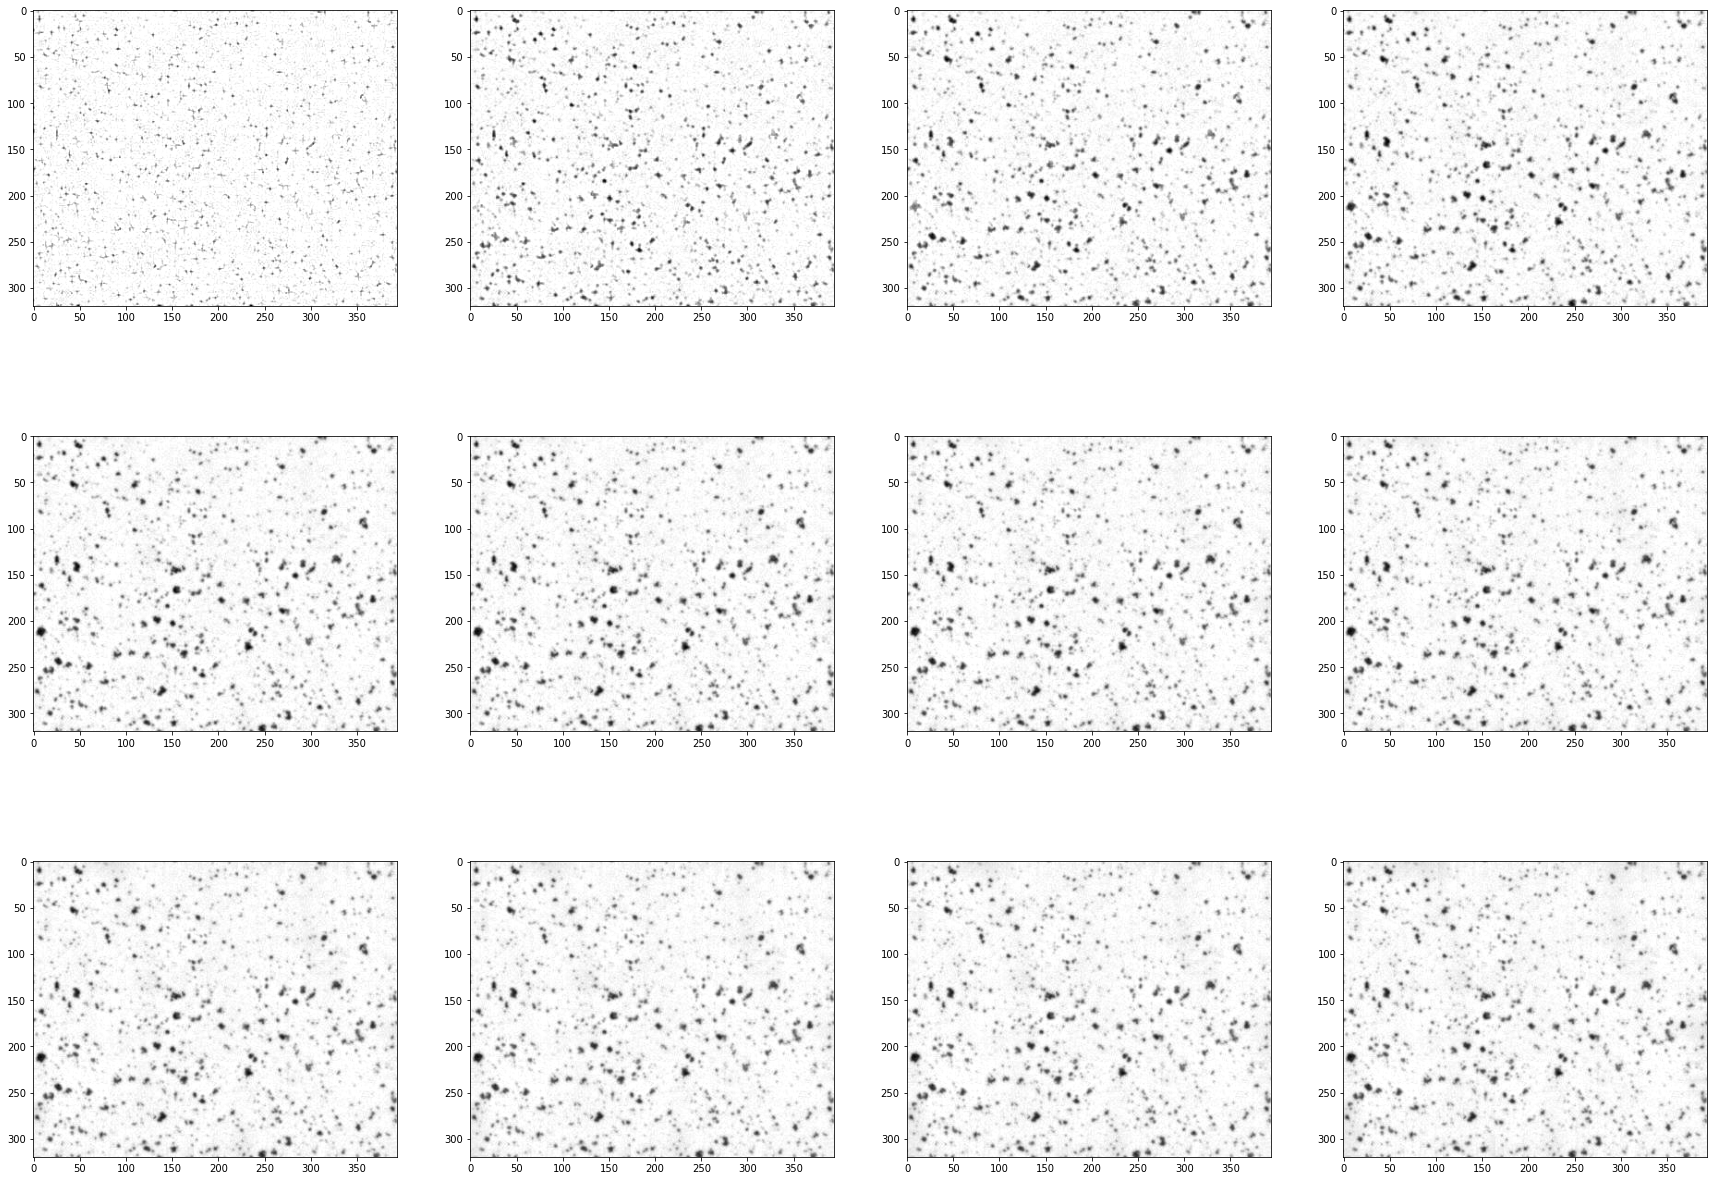

In [104]:
#Q1
#Background subtraction


index = 1
plt.figure(figsize=(30,30))
for N in range(3,maxNeighbour + 1,2):
    one_musk = np.ones([N, N])
    #padding
    l = N // 2
    #make the center become 0
    #one_musk[l, l] = 0
    img_padded = cv2.copyMakeBorder(image, l,l,l,l, cv2.BORDER_CONSTANT, value=255)
    #max-filtered
    for row in range(l, height+ l):
        for col in range(l, width + l):
            neighbourhood = img_padded[row - l:row + l + 1, col - l: col + l + 1] * one_musk
            imgA[row - l,col - l] = np.max(neighbourhood)
       
    imgA_padded = cv2.copyMakeBorder(imgA, l,l,l,l, cv2.BORDER_CONSTANT, value=255)
    #min-filtered
    for row in range(l, height+ l):
        for col in range(l, width + l):
            neighbourhood = imgA_padded[row - l:row + l + 1, col - l: col + l + 1] * one_musk
            imgB[row - l,col - l] = np.min(neighbourhood)         
 
#Q2
    output = np.zeros_like(image)
    for row in range(height):
        for col in range(width):
            # simply  subtracting B pixel by pixel from I(original one)
            output[row, col] = image[row, col].astype("int32") - imgB[row, col].astype("int32")
            output[row, col] += 255 if output[row,col] <= 0 else 0

#    
    plt.subplot(4,4,index)
    output = np.absolute(output).astype("uint8")
    plt.imshow(output,"gray")
    index += 1
plt.show()



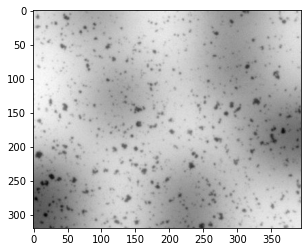

In [81]:
#we can see the differnce between the new image and the original one
#we tried all possible N and 
plt.imshow(image,"gray")

In [82]:
#Q3
# iter
cells = cv2.imread("Cells.png",0)

In [83]:
cells

array([[ 18,  17,  17, ...,  82,  79,  74],
       [ 16,  16,  16, ...,  81,  78,  74],
       [ 17,  17,  17, ...,  83,  79,  76],
       ...,
       [  2,   3,   3, ..., 114, 114, 114],
       [  3,   3,   3, ..., 114, 114, 114],
       [  3,   2,   2, ..., 114, 114, 114]], dtype=uint8)

In [190]:
imgA_B = np.zeros_like(cells)
imgB_B = np.zeros_like(cells)
heightB = cells.shape[0]
widthB = cells.shape[1]
maxNeighbourB = max(math.floor(math.sqrt(heightB)),math.floor(math.sqrt(widthB)))
maxNeighbourB


33

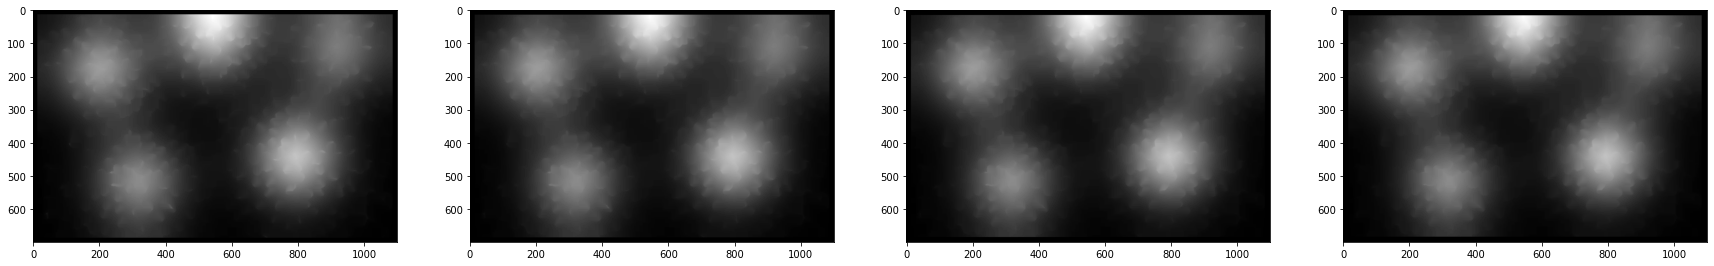

In [193]:
index = 1
plt.figure(figsize=(30,30))
# just part of the results
for N in range(27,maxNeighbourB + 1,2):
    one = np.ones([N, N])
    #padding
    l = N // 2
    img_padded_B = cv2.copyMakeBorder(cells, l,l,l,l, cv2.BORDER_CONSTANT, value=0)
    
    #min-filtered
    for row in range(l, heightB+ l):
        for col in range(l, widthB + l):
            neighbourhood = img_padded_B[row - l:row + l + 1, col - l: col + l + 1] * one
            imgA_B[row - l,col - l] = np.min(neighbourhood)     
    plt.subplot(4,4,index)
    plt.imshow(imgA_B,"gray")
    index += 1
plt.show()

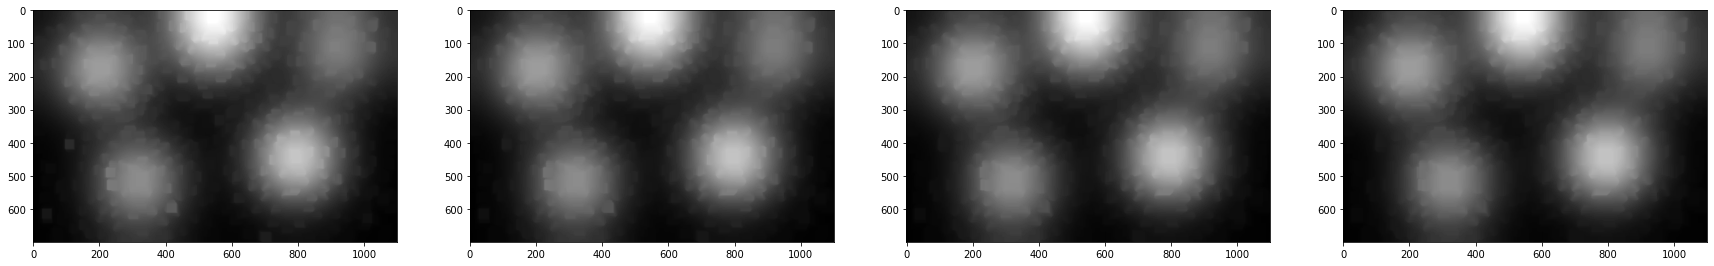

In [195]:

index = 1
plt.figure(figsize=(30,30))
# just part of the results
for N in range(27,maxNeighbourB + 1,2):
    one = np.ones([N, N])
    #padding
    l = N // 2
    img_padded_B = cv2.copyMakeBorder(cells, l,l,l,l, cv2.BORDER_CONSTANT, value=0)
    
    #min-filtered
    for row in range(l, heightB+ l):
        for col in range(l, widthB + l):
            neighbourhood = img_padded_B[row - l:row + l + 1, col - l: col + l + 1] * one
            imgA_B[row - l,col - l] = np.min(neighbourhood)         
    

    imgA_B_padded = cv2.copyMakeBorder(imgA_B, l,l,l,l, cv2.BORDER_CONSTANT, value=0)
        
    #max-filtered
    for row in range(l, heightB+ l):
        for col in range(l, widthB + l):
            neighbourhood = imgA_B_padded[row - l:row + l + 1, col - l: col + l + 1] * one
            imgB_B[row - l,col - l] = np.max(neighbourhood)

    plt.subplot(4,4,index)
    plt.imshow(imgB_B,"gray")
    index += 1
plt.show()

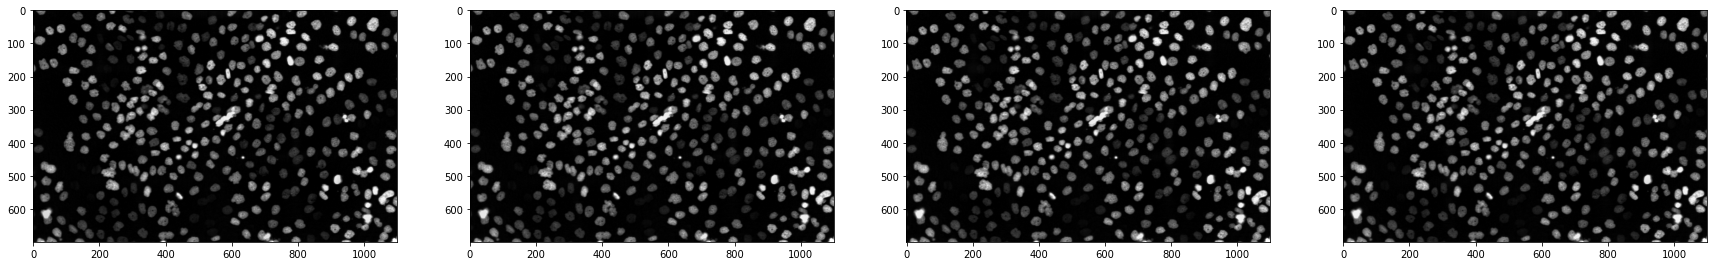

In [197]:
index = 1
plt.figure(figsize=(30,30))
for N in range(27,maxNeighbourB + 1,2):
    one = np.ones([N, N])
    #padding
    l = N // 2
    img_padded_B = cv2.copyMakeBorder(cells, l,l,l,l, cv2.BORDER_CONSTANT, value=0)
    
    #min-filtered
    for row in range(l, heightB+ l):
        for col in range(l, widthB + l):
            neighbourhood = img_padded_B[row - l:row + l + 1, col - l: col + l + 1] * one
            imgA_B[row - l,col - l] = np.min(neighbourhood)         
    

    imgA_B_padded_ = cv2.copyMakeBorder(imgA_B, l,l,l,l, cv2.BORDER_CONSTANT, value=0)
        
    #max-filtered
    for row in range(l, heightB+ l):
        for col in range(l, widthB + l):
            neighbourhood = imgA_B_padded_[row - l:row + l + 1, col - l: col + l + 1] * one
            imgB_B[row - l,col - l] = np.max(neighbourhood)

    output_B = np.zeros_like(cells)
    for row in range(heightB):
        for col in range(widthB):
            # simply  subtracting B pixel by pixel from I(original one)
            output_B[row, col] = cells[row, col].astype("int32") - imgB_B[row, col].astype("int32")
            output_B[row, col] -= 255 if output_B[row,col] >= 255 else 0
            
    plt.subplot(4,4,index)
    output_B = np.absolute(output_B).astype("uint8")
    plt.imshow(output_B,"gray")
    index += 1
plt.show()

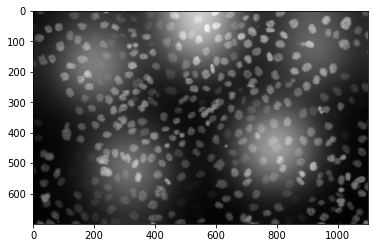

In [222]:
plt.imshow(cells,"gray")

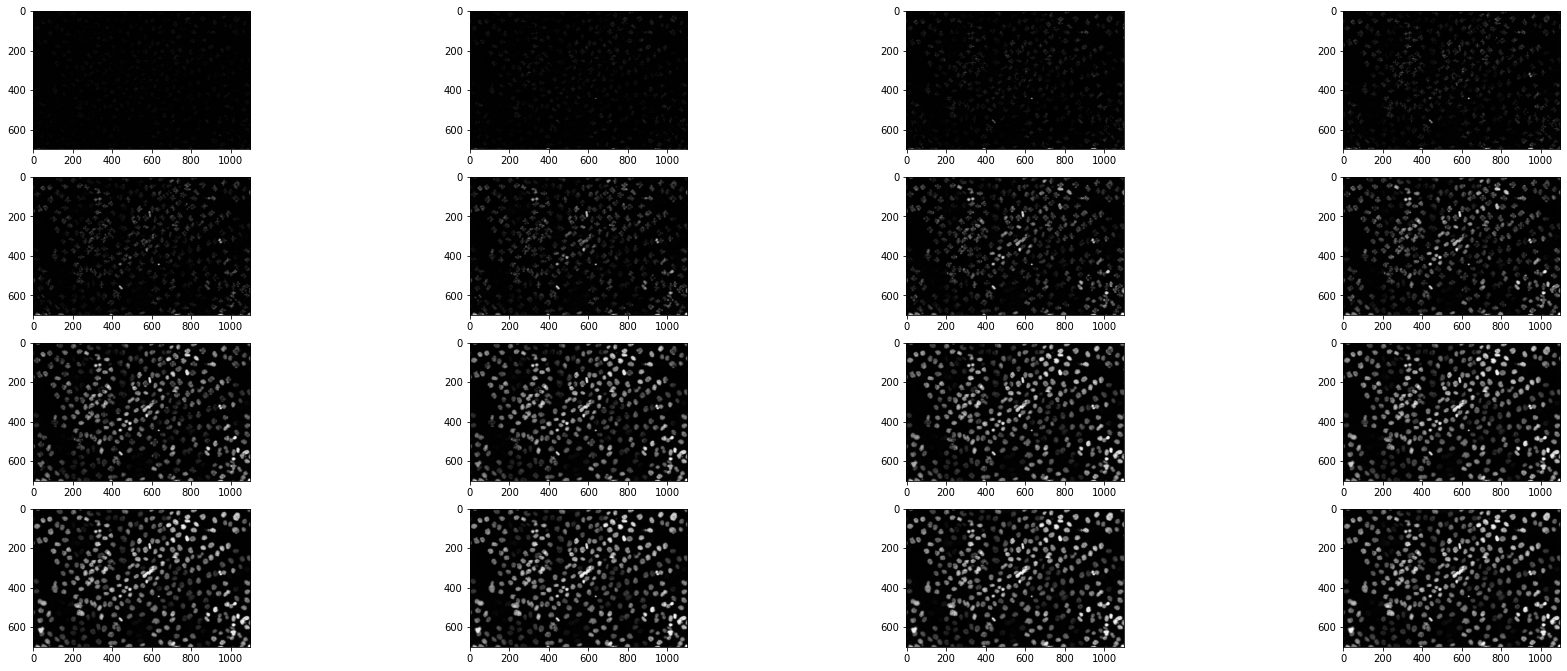

In [225]:
index = 1
plt.figure(figsize=(30,30))
#all the N to find the best one
for N in range(3,maxNeighbourB + 1,2):
    one = np.ones([N, N])
    #padding
    l = N // 2
    img_padded_B = cv2.copyMakeBorder(cells, l,l,l,l, cv2.BORDER_CONSTANT, value=0)
    
    #min-filtered
    for row in range(l, heightB+ l):
        for col in range(l, widthB + l):
            neighbourhood = img_padded_B[row - l:row + l + 1, col - l: col + l + 1] * one
            imgA_B[row - l,col - l] = np.min(neighbourhood)         
    

    imgA_B_padded_ = cv2.copyMakeBorder(imgA_B, l,l,l,l, cv2.BORDER_CONSTANT, value=0)
        
    #max-filtered
    for row in range(l, heightB+ l):
        for col in range(l, widthB + l):
            neighbourhood = imgA_B_padded_[row - l:row + l + 1, col - l: col + l + 1] * one
            imgB_B[row - l,col - l] = np.max(neighbourhood)

    output_B = np.zeros_like(cells)
    for row in range(heightB):
        for col in range(widthB):
            # simply  subtracting B pixel by pixel from I(original one)
            output_B[row, col] = cells[row, col].astype("int32") - imgB_B[row, col].astype("int32")
            output_B[row, col] -= 255 if output_B[row,col] >= 255 else 0
            
    plt.subplot(10,4,index)
    output_B = np.absolute(output_B).astype("uint8")
    plt.imshow(output_B,"gray")
    index += 1
plt.show()

In [201]:
#now make it a function for all the imges.
def max_filtered(img,N,bgcolor):
    imgA = np.zeros_like(img)
    height = img.shape[0]
    width = img.shape[1]
    one = np.ones([N, N])
    #padding
    l = N // 2
    img_padded = cv2.copyMakeBorder(img, l,l,l,l, cv2.BORDER_CONSTANT, value=bgcolor)
    #max-filtered
    for row in range(l, height+ l):
        for col in range(l, width + l):
            neighbourhood = img_padded[row - l:row + l + 1, col - l: col + l + 1] * one
            imgA[row - l,col - l] = np.max(neighbourhood)
    return imgA

    

In [202]:
def min_filtered(img,N,bgcolor):
    imgA = np.zeros_like(img)
    height = img.shape[0]
    width = img.shape[1]
    one = np.ones([N, N])
    #padding
    l = N // 2
    img_padded = cv2.copyMakeBorder(img, l,l,l,l, cv2.BORDER_CONSTANT, value=bgcolor)
    #min-filtered
    for row in range(l, height+ l):
        for col in range(l, width + l):
            neighbourhood = img_padded[row - l:row + l + 1, col - l: col + l + 1] * one
            imgA[row - l,col - l] = np.min(neighbourhood)
    return imgA

In [216]:
def mysub(img1, img2, bgcolor):
    O = np.zeros_like(img1)
    height = img1.shape[0]
    width = img1.shape[1]
    for row in range(height):
        for col in range(width):
            O[row, col] = img1[row, col].astype("int32") - img2[row, col].astype("int32")
            if bgcolor == 0:    
                O[row,col] -= 255 if O[row, col] >= 255 else 0
            elif bgcolor == 255:
                O[row,col] += 255 if O[row , col] <= 0 else 0
                
    return O

In [217]:
# m = 0, the background is white.
# m = 1, the background is black.
def t3(img, N, M):
    if M == 0:
        A = max_filtered(img,N,255)
        B = min_filtered(A,N,255)
        O = mysub(img,B,255)
    elif M == 1:
        A = min_filtered(img,N,0)
        B = max_filtered(A,N,0)
        O = mysub(img,B,0)
    O = np.absolute(O).astype("uint8")
    return O
    


In [218]:
res = t3(image,21,0)

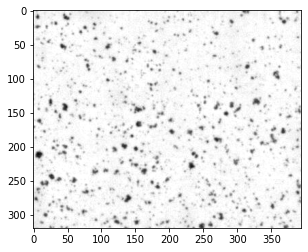

In [219]:
plt.imshow(res,"gray")

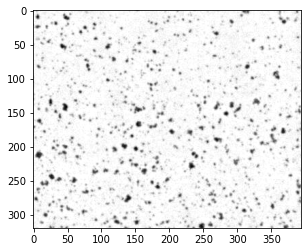

In [226]:
res = t3(image,9,0)
plt.imshow(res,"gray")

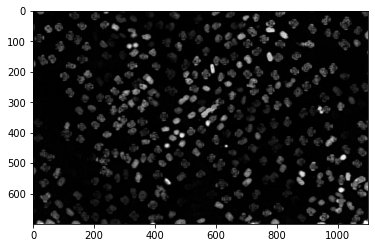

In [233]:
res = t3(cells,17,1)
plt.imshow(res,"gray")

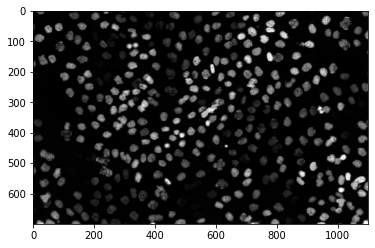

In [230]:
res = t3(cells,21,1)
plt.imshow(res,"gray")

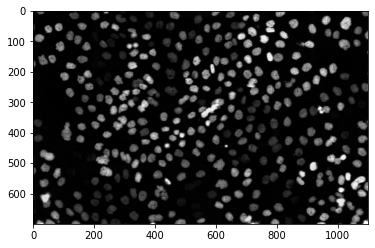

In [234]:
res = t3(cells,27,1)
plt.imshow(res,"gray")

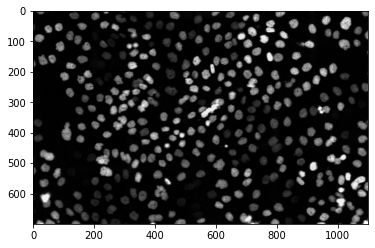

In [235]:
res = t3(cells,33,1)
plt.imshow(res,"gray")

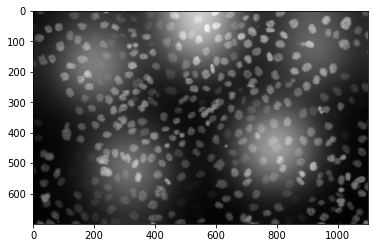

In [232]:
plt.imshow(cells,"gray")

In [239]:
# we can hard code the N, indeed, the best smallest one should be at least half of the max neighbour
# and just use the max neigbour will definitely get a good result.
# if N is not given, then t3 can be changed like this.

def t3_withoutN(img, M):
    height = img.shape[0]
    width = img.shape[1]
    N = max(math.floor(math.sqrt(height)),math.floor(math.sqrt(width)))
    if N % 2 == 0:
        N = N -1
    
    if M == 0:
        A = max_filtered(img,N,255)
        B = min_filtered(A,N,255)
        O = mysub(img,B,255)
    elif M == 1:
        A = min_filtered(img,N,0)
        B = max_filtered(A,N,0)
        O = mysub(img,B,0)
    O = np.absolute(O).astype("uint8")
    return O


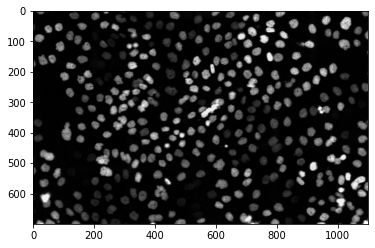

In [240]:
res = t3_withoutN(cells,1)
plt.imshow(res,"gray")

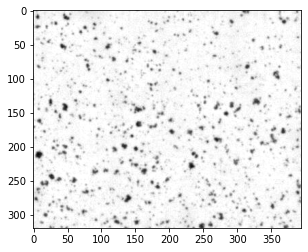

In [241]:
res = t3_withoutN(image,0)
plt.imshow(res,"gray")